# Data Analysis of SN7577: Audit of Political Engagement

In [376]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [377]:
# Reading a csv file
df_SN7577 = pd.read_csv("SN7577.tab", sep='\t')

In [378]:
# Getting information about a Dataframe
df_SN7577

,Q1,Q2,Q3,Q4,Q5ai,Q5aii,Q5aiii,Q5aiv,Q5av,Q5avi,...,numhhd,numkid,numkid2,numkid31,numkid32,numkid33,numkid34,numkid35,numkid36,wts
0,1,-1,1,8,0,0,0,1,0,0,...,3,11,2,0,0,0,0,1,0,1.11
1,3,-1,1,4,0,0,0,0,0,0,...,3,11,2,0,0,0,0,1,0,2.57
2,10,3,2,6,0,0,0,0,0,0,...,2,11,2,0,0,0,0,1,0,2.04
3,9,-1,10,10,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,1.08
4,10,2,6,1,0,0,0,1,0,0,...,1,-1,2,0,0,0,0,1,0,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,2,-1,3,6,0,0,0,0,0,0,...,2,-1,2,0,0,0,0,1,0,0.85
1282,10,10,2,10,0,0,0,0,0,0,...,1,-1,2,0,0,0,0,1,0,2.31
1283,9,-1,8,9,0,0,0,0,0,0,...,4,2,1,1,0,0,0,0,0,2.85
1284,11,11,1,2,0,0,0,1,1,0,...,2,-1,2,0,0,0,0,1,0,3.46


### Descriptive Statistics

In [373]:
# Creating a dataframe with relevant variables
df2 = pd.DataFrame(df_SN7577, columns=['Q6', 'agegroups', 'Q7a', 'Q3', 'Q14', 'Q5axv', 'Q5bxv'])

In [374]:
# Counting total responses by age group
df2.groupby(by="agegroups").count()

,Q6,Q7a,Q3,Q14,Q5axv,Q5bxv
agegroups,,,,,,
1,173,173,173,173,173,173
2,193,193,193,193,193,193
3,205,205,205,205,205,205
4,211,211,211,211,211,211
5,199,199,199,199,199,199
6,188,188,188,188,188,188
7,117,117,117,117,117,117


In [264]:
# Grouping "very interested" and "fairly interested" in politics responses by age group
interest = df2[(df2.Q6 == 1)| (df2.Q6 == 2)].groupby(by="agegroups").count()["Q6"] 

In [265]:
# Printing count by age group
interest

agegroups
1     62
2     67
3     81
4    104
5    121
6    122
7     69
Name: Q6, dtype: int64

In [266]:
# Grouping "a great deal" and "a fair amount" of knowledge responses by age group
knowledge = df2[(df2.Q7a == 1) | (df2.Q7a == 2)].groupby(by="agegroups").count()["Q7a"] 

In [267]:
# Printing count by age group
knowledge

agegroups
1     64
2     73
3     93
4    108
5    112
6    124
7     73
Name: Q7a, dtype: int64

In [162]:
# Creating data for Interest and Knowledge of politics table
data = {'Age Group': ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'], 'Interested in Politics': [62, 67, 81, 104, 121, 122, 69], 'Knowledge of Politics': [64, 73, 93, 108, 112, 124, 73], 'Total': [173, 193, 205, 211, 199, 188, 117]}

In [163]:
# Creating dataframe for Interest and Knowledge of politics table
df1 = pd.DataFrame(data)

In [164]:
# Adding percentage columns for Interest and Knowledge
df1['% Interest'] = (df['Interested in Politics']/df['Total'])*100 
df1['% Knowledge'] = (df['Knowledge of Politics']/df['Total'])*100 
pd.options.display.float_format = '{:,.2f}'.format

In [165]:
# Printing dataframe for Interest and Knowledge
df1

,Age Group,Interested in Politics,Knowledge of Politics,Total,% Interest,% Knowledge
0,18-24,62,64,173,35.84,36.99
1,25-34,67,73,193,34.72,37.82
2,35-44,81,93,205,39.51,45.37
3,45-54,104,108,211,49.29,51.18
4,55-64,121,112,199,60.80,56.28
5,65-74,122,124,188,64.89,65.96
6,75+,69,73,117,58.97,62.39


In [270]:
# Grouping "very strong" and "fairly strong" supporters of any political candidate responses by age group
supporter = df2[(df2.Q14 == 1) | (df2.Q14 == 2)].groupby(by="agegroups").count()["Q14"] 
supporter

agegroups
1    40
2    38
3    50
4    63
5    76
6    77
7    52
Name: Q14, dtype: int64

In [273]:
# Grouping "not very strong" supporters of any political candidate responses by age group
mild_supporter = df2[(df2.Q14 == 3)].groupby(by="agegroups").count()["Q14"] 
mild_supporter

agegroups
1    49
2    80
3    71
4    81
5    75
6    65
7    36
Name: Q14, dtype: int64

In [274]:
# Grouping "not a supporter" and "don't know" and "refused" responses by age group
not_supporter = df2[(df2.Q14 == 4)| (df2.Q14 == 5)| (df2.Q14 == 6)].groupby(by="agegroups").count()["Q14"] 
not_supporter

agegroups
1    84
2    75
3    84
4    67
5    48
6    46
7    29
Name: Q14, dtype: int64

In [324]:
# Creating data for Sense of Partisanship table
data3 = {'Age Group': ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'],'Very/fairly strong' : [40, 38, 50, 63, 76, 77, 52], 'Not very strong' : [49, 80, 71, 81, 75, 65, 36], 'Not a supporter' : [84, 75, 84, 67, 48, 46,29], 'Total': [173, 193, 205, 211, 199, 188, 117]}

In [325]:
# Creating dataframe for Sense of Partisanship table
df_supporter = pd.DataFrame(data3)
df_supporter

,Age Group,Very/fairly strong,Not very strong,Not a supporter,Total
0,18-24,40,49,84,173
1,25-34,38,80,75,193
2,35-44,50,71,84,205
3,45-54,63,81,67,211
4,55-64,76,75,48,199
5,65-74,77,65,46,188
6,75+,52,36,29,117


In [328]:
# Turning Sense of Partisanship table values into percentages
df_supporter_ptg = pd.DataFrame()
df_supporter_ptg['Age Group'] = df_supporter['Age Group']
df_supporter_ptg['% Very/fairly strong'] = (df_supporter['Very/fairly strong']/df['Total'])*100 
df_supporter_ptg['% Not very strong'] = (df_supporter['Not very strong']/df['Total'])*100 
df_supporter_ptg['% Not a supporter'] = (df_supporter['Not a supporter']/df['Total'])*100 
df_supporter_ptg

,Age Group,% Very/fairly strong,% Not very strong,% Not a supporter
0,18-24,23.12,28.32,48.55
1,25-34,19.69,41.45,38.86
2,35-44,24.39,34.63,40.98
3,45-54,29.86,38.39,31.75
4,55-64,38.19,37.69,24.12
5,65-74,40.96,34.57,24.47
6,75+,44.44,30.77,24.79


In [178]:
# Binning "very interested" and "fairly interested" in politics responses into "interested in politics" 
interested = df2[ (df2.Q6 == 1 ) | (df2.Q6 == 2)][['Q6', 'Q3']]
# Binning "not very interested" and "not at all interested" in politics responses into "not interested in politics" 
not_interested = df2[ (df2.Q6 == 3 ) | (df2.Q6 == 4)][['Q6', 'Q3']]

In [187]:
# Grouping "interested in politics" responses by age group
interested.groupby(by = 'Q3').count()

,Q6
Q3,
1,420
2,42
3,39
4,24
5,17
6,25
7,5
8,9
9,8


In [217]:
# Grouping "not interested in politics" responses by age group
not_interested.groupby(by = 'Q3').count()

,Q6
Q3,
1,211
2,30
3,54
4,43
5,39
6,73
7,21
8,22
9,30


In [379]:
# Creating data and dataframe for Certainty to Vote table based on interest/disinterest in politics
data2 = {'Likely to vote': ['Certain to vote (score 10)', 'Likely to vote (score 6-9)', 'Unlikely to vote (score 2-5)', 'Certain not to vote (score 1)', 'Don’t know / refused'], 'Interested': [420, 122, 47, 32, 5], 'Not Interested': [211, 166, 146, 118, 17]}
df_vote1 = pd.DataFrame(data2).set_index('Likely to vote')
df_vote1

,Interested,Not Interested
Likely to vote,,
Certain to vote (score 10),420,211
Likely to vote (score 6-9),122,166
Unlikely to vote (score 2-5),47,146
Certain not to vote (score 1),32,118
Don’t know / refused,5,17


In [341]:
# Grouping "null" responses to political activity participation by age group
involvement = df2[(df2.Q5axv == 1)].groupby(by="agegroups").count()['Q5axv']
involvement

agegroups
1    112
2    119
3    114
4     94
5     93
6     82
7     59
Name: Q5axv, dtype: int64

In [350]:
# Grouping "null" responses to potential political activity participation by age group
potential_involvement = df2[(df2.Q5bxv == 1)].groupby(by="agegroups").count()['Q5bxv']
potential_involvement

agegroups
1    47
2    58
3    57
4    25
5    27
6    23
7    24
Name: Q5bxv, dtype: int64

In [375]:
# Creating dataframe for Actual and Potential Political Activity Participation table
data4 = {'Age Group': ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+'], 'No activities to influence decisions, laws or policies': [112, 119, 114, 94, 93, 82, 59], 'No activities even if felt strongly about issue':[47, 58, 57, 25, 27, 23, 24], 'Total': [173, 193, 205, 211, 199, 188, 117]}
activities = pd.DataFrame(data4)
activities['Any activities to influence decisions, laws or policies'] = (activities['Total'] - activities['No activities to influence decisions, laws or policies'])
activities['Willing to do any activity if felt strongly about issue'] = (activities['Total'] - activities['No activities even if felt strongly about issue'])
activities

,Age Group,"No activities to influence decisions, laws or policies",No activities even if felt strongly about issue,Total,"Any activities to influence decisions, laws or policies",Willing to do any activity if felt strongly about issue
0,18-24,112,47,173,61,126
1,25-34,119,58,193,74,135
2,35-44,114,57,205,91,148
3,45-54,94,25,211,117,186
4,55-64,93,27,199,106,172
5,65-74,82,23,188,106,165
6,75+,59,24,117,58,93


In [353]:
# Converting political activities table values into percentages
activities_ptg = pd.DataFrame()
activities_ptg['Age Group'] = activities['Age Group']
activities_ptg['% Any activities to influence decisions, laws or policies'] = (activities['Any activities to influence decisions, laws or policies']/df['Total'])*100 
activities_ptg['% Willing to do any activity if felt strongly about an issue'] = (activities['Willing to do any activity if felt strongly about issue']/df['Total'])*100
activities_ptg

,Age Group,"% Any activities to influence decisions, laws or policies",% Willing to do any activity if felt strongly about an issue
0,18-24,35.26,72.83
1,25-34,38.34,69.95
2,35-44,44.39,72.20
3,45-54,55.45,88.15
4,55-64,53.27,86.43
5,65-74,56.38,87.77
6,75+,49.57,79.49


# Situation

 - Interest in politics is low in youth. From the distribution in Figure 1, we can observe that political interest is skewed toward older citizens. Only 35.84% of respondents aged 18-24 and 34.72% of respondents aged 25-34 said they were at least fairly interested in politics.
 
 
 - Young people do not have sufficient political information. When asked _"How much, if anything, do you feel you know about politics?"_, 36.99% of youths aged 18-24 and 37.82% of those aged 25-34 answered that they knew a fair amount or a great deal. In contrast, 65.96% of respondents aged 65-74 and 62.39% of respondents aged 75+ answered the same. Figure 2 shows that perceived political knowledge is also skewed toward older age groups.
 
 
 - Most youths don't have a strong sense of partisanship. Feelings of not being connected with any particular political groups are cited by 48.55% of the 18-24 age group, in contrast with 25.79% for the 75+ age group. Figure 3 shows a low percentage of very/fairly strong supporters of political parties among the younger age groups compared to the older age groups.

### Figure 1 : Interest in politics by age group

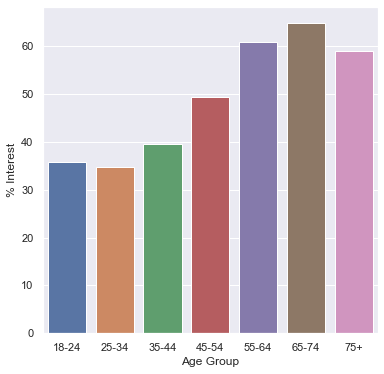

In [318]:
# Plot data
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(6,6)})
sns.barplot(x = 'Age Group', y = '% Interest', data = df1)
plt.show()

### Figure 2: Perceived knowledge of politics by age group 

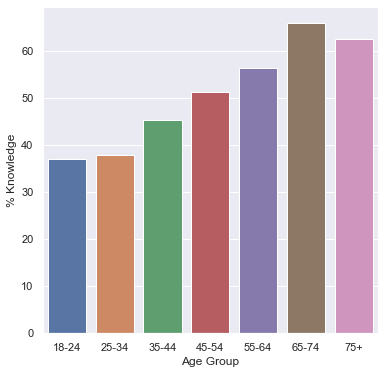

In [319]:
# Plot data
sns.barplot(x = 'Age Group', y = '% Knowledge', data = df1)
plt.show()

### Figure 3: Sense of partisanship to a political party by age group

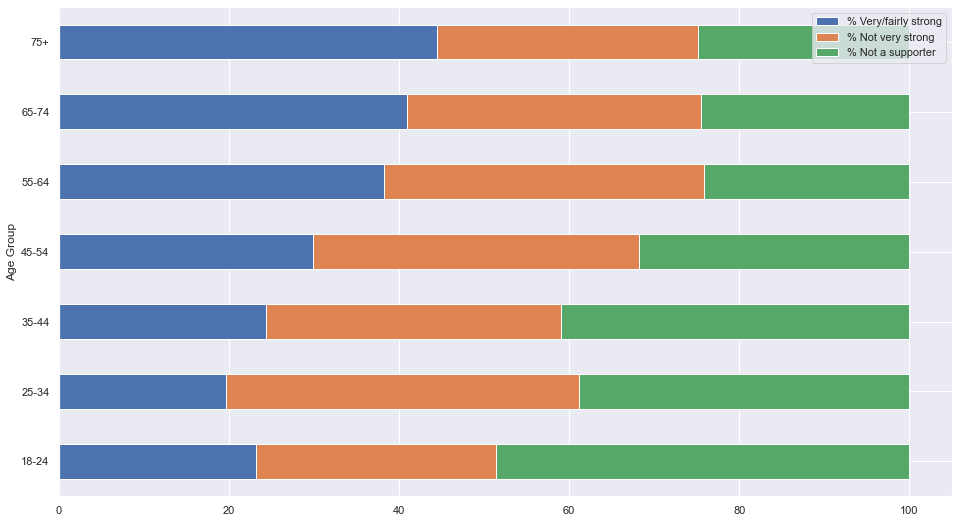

In [367]:
# plot data in stack manner of bar type
df_supporter_ptg.plot(x='Age Group', kind='barh', stacked=True, figsize = (16, 9));

# Problem

- Interest in politics is an important factor in political engagement. A lack of interest in politics generally leads to a lack of representation in the current political system across all respondents. While 67.1% of those who are at least fairly interested in politics are certain to vote in an immediate general election (Figure 4), only 32.1% of those who aren't very interested or aren't at all interested in politics say the same (Figure 5). 


- Similarly, disinterest in politics increases the percentage of those unlikely to vote and certain not to vote. In Figure 4, these groups are comprised of 7.5% and 5.1% of respondents respectively. In Figure 5, these numbers have increased to 22.2% and 17.9% respectively, resulting in a significant decrease in respondents likely to cast votes during elections.  


- Disengagement in politics leads to little participation in activities that influence decisions, laws, and policies. When polled about the actions they have undertaken in the past 12 months, examples including signing a petition, voting in an election, and taking an active part in a campaign, only 35.26% of the 18-24 age group claimed to have participated in any of the listed activities (Figure 6). 

### Figure 4: Certainty to vote for those interested in politics

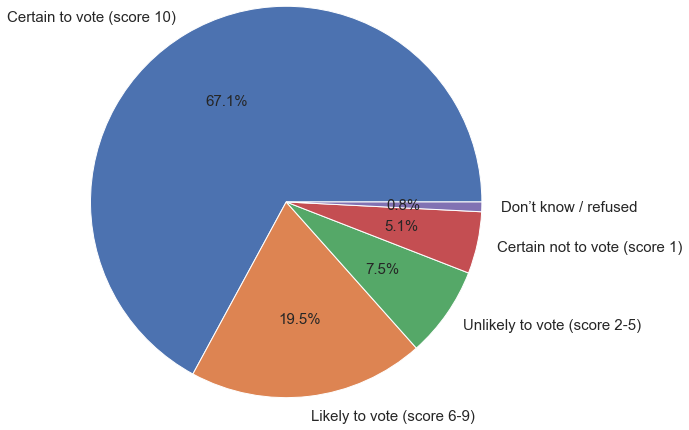

In [380]:
# Plot data
pie1 = df_vote1.plot.pie(y ='Interested', autopct="%.1f%%", radius=1.5, textprops = {"fontsize":15});
pie1.get_legend().remove()

### Figure 5: Certainty to vote for those not interested in politics

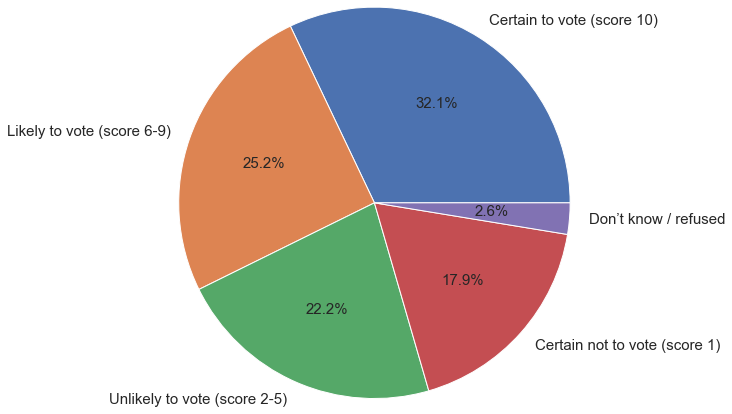

In [381]:
# Plot data
pie1 = df_vote1.plot.pie(y ='Not Interested', autopct="%.1f%%", radius=1.5, textprops = {"fontsize":15});
pie1.get_legend().remove()

### Figure 6: Political activities: actual and potential by age group

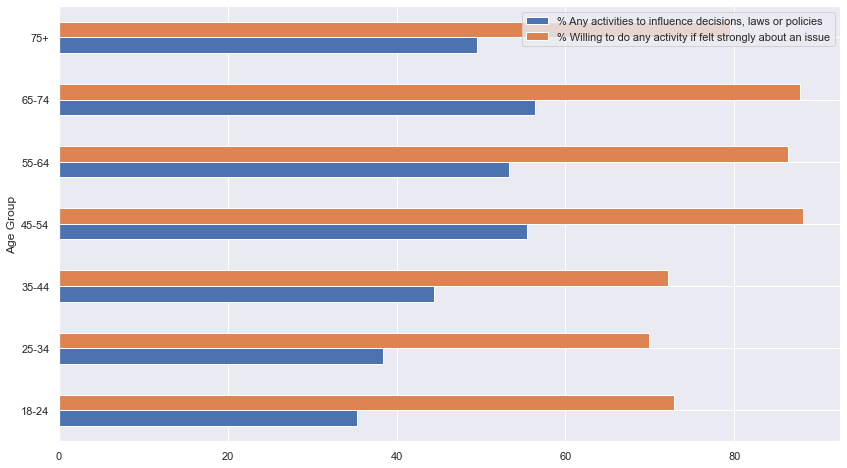

In [365]:
# Plot data 
activities_ptg.plot(x='Age Group', kind='barh',  figsize = (14, 8));

# Solution

- To properly engage young people, more information and education must be tailored to their interests and unique circumstances. Figure 6 shows that 72.83% of the 18-24 years age group is willing to participate in political activities if they felt strongly enough about the issues. 


- Increase youth involvement in the current political system through recruitment. Injecting younger employees into the personnel of politics will lead to higher participation rates and increased relatability with younger age groups within the population. 


- Increase presence of political issues in online spaces that reach a younger audience. Content creation, increased media exposure, and the creation of communication channels between youths and political leaders should be established to increase both knowledge of and interest in political issues, with the aim of building partisanship among the younger generation. 

# Next Steps

- Create a committee of recruiters to promote jobs in politics to young adults and hire them for roles in political positions such as young leaders and electoral candidates. 


- Open communication channels on social media websites such as Twitter and Facebook where members of political parties and youths can interact in a quick and easy manner.


- On these channels, create and promote specifically tailored educational and informative content for a younger audience. Encourage participation and discourse in varied topics relevant to the younger generation's interests. 
